In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary library requirements
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

# **1.Data Understanding**

## 1.1. Data Collection:
- Nguồn từ Kaggle: Retail Store Inventory Forecasting Dataset
- [Link](https://www.kaggle.com/datasets/anirudhchauhan/retail-store-inventory-forecasting-dataset)



In [ ]:
file_path = "/content/Retail Store Inventory Forecasting Dataset.csv"
data = pd.read_csv(file_path, encoding='unicode_escape')

## 1.2. Data Description

In [ ]:
data.shape

(73100, 16)

In [ ]:
data.head()

Date Store ID Product ID Region  Inventory Level  Units Sold  \
0  1/1/2022     S001      P0001  North              231         127   
1  1/1/2022     S001      P0002  South              204         150   
2  1/1/2022     S001      P0003   West              102          65   
3  1/1/2022     S001      P0004  North              469          61   
4  1/1/2022     S001      P0005   East              166          14   

   Units Ordered  Demand Forecast  Price  Discount Weather Condition  \
0             55           135.47  33.50        20             Rainy   
1             66           144.04  63.01        20             Sunny   
2             51            74.02  27.99        10             Sunny   
3            164            62.18  32.72        10            Cloudy   
4            135             9.26  73.64         0             Sunny   

   Holiday/Promotion  Competitor Pricing Seasonality Product_ID     Category  
0                  0               29.69      Autumn      G0001    Groceries  
1                  0               66.16      Autumn      T0002         Toys  
2                  1               31.32      Summer      T0003         Toys  
3                  1               34.74      Autumn      T0004         Toys  
4                  0               68.95      Summer      E0005  Electronics

**Key Data Features:**
  - Date: Daily records from [start_date] to [end_date].
  - Store ID & Product ID: Unique identifiers for stores and products.
  - Category: Product categories like Electronics, Clothing, Groceries, etc.
  - Region: Geographic region of the store.
  - Inventory Level: Stock available at the beginning of the day.
  - Units Sold: Units sold during the day.
  - Demand Forecast: Predicted demand based on past trends.
  - Weather Condition: Daily weather impacting sales.
  - Holiday/Promotion: Indicators for holidays or promotions.

In [ ]:
data.dtypes

Date                   object
Store ID               object
Product ID             object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
Product_ID             object
Category               object
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Region              73100 non-null  object 
 4   Inventory Level     73100 non-null  int64  
 5   Units Sold          73100 non-null  int64  
 6   Units Ordered       73100 non-null  int64  
 7   Demand Forecast     73100 non-null  float64
 8   Price               73100 non-null  float64
 9   Discount            73100 non-null  int64  
 10  Weather Condition   73100 non-null  object 
 11  Holiday/Promotion   73100 non-null  int64  
 12  Competitor Pricing  73100 non-null  float64
 13  Seasonality         73100 non-null  object 
 14  Product_ID          73100 non-null  object 
 15  Category            73100 non-null  object 
dtypes: f

In [ ]:
data

Date Store ID Product ID Region  Inventory Level  Units Sold  \
0      1/1/2022     S001      P0001  North              231         127   
1      1/1/2022     S001      P0002  South              204         150   
2      1/1/2022     S001      P0003   West              102          65   
3      1/1/2022     S001      P0004  North              469          61   
4      1/1/2022     S001      P0005   East              166          14   
...         ...      ...        ...    ...              ...         ...   
73095  1/1/2024     S005      P0016   East               96           8   
73096  1/1/2024     S005      P0017  North              313          51   
73097  1/1/2024     S005      P0018   West              278          36   
73098  1/1/2024     S005      P0019   East              374         264   
73099  1/1/2024     S005      P0020   East              117           6   

       Units Ordered  Demand Forecast  Price  Discount Weather Condition  \
0                 55           135.47  33.50        20             Rainy   
1                 66           144.04  63.01        20             Sunny   
2                 51            74.02  27.99        10             Sunny   
3                164            62.18  32.72        10            Cloudy   
4                135             9.26  73.64         0             Sunny   
...              ...              ...    ...       ...               ...   
73095            127            18.46  73.73        20             Snowy   
73096            101            48.43  82.57        10            Cloudy   
73097            151            39.65  11.11        10             Rainy   
73098             21           270.52  53.14        20             Rainy   
73099            165             2.33  78.39        20             Rainy   

       Holiday/Promotion  Competitor Pricing Seasonality Product_ID  \
0                      0               29.69      Autumn      G0001   
1                      0               66.16      Autumn      T0002   
2                      1               31.32      Summer      T0003   
3                      1               34.74      Autumn      T0004   
4                      0               68.95      Summer      E0005   
...                  ...                 ...         ...        ...   
73095                  0               72.45      Winter      F0016   
73096                  0               83.78      Autumn      T0017   
73097                  0               10.91      Winter      C0018   
73098                  0               55.80      Spring      T0019   
73099                  1               79.52      Spring      G0020   

          Category  
0        Groceries  
1             Toys  
2             Toys  
3             Toys  
4      Electronics  
...            ...  
73095    Furniture  
73096         Toys  
73097     Clothing  
73098         Toys  
73099    Groceries  

[73100 rows x 16 columns]

In [ ]:
data.describe()

Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.000000            5.030000  
25%       32.650000      5.000000           0.000000           32.680000  
50%       55.050000     10.000000           0.000000           55.010000  
75%       77.860000     15.000000           1.000000           77.820000  
max      100.000000     20.000000           1.000000          104.940000

In [ ]:
data.isna().sum()

Date                  0
Store ID              0
Product ID            0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
Product_ID            0
Category              0
dtype: int64

In [ ]:
data = data.drop(columns=["Product ID"])


In [ ]:
data.duplicated().sum()

0

In [ ]:
# Đổi tên để bớt rườm rà lúc xử lý, phần này kh cần xác định nó nằm phần nào đâu ha
data = data.rename(columns={'Inventory Level': 'Inventory',
                        'Units Sold': 'Sales_Quantity',
                        'Units Ordered': 'Orders_Quantity',
                        'Weather Condition': 'Weather',
                        'Holiday/Promotion': 'Promotion',
                            'Date':'date'})

# **2.EDA**

- Theo link này: https://blog.tomorrowmarketers.org/exploratory-data-analysis-la-gi/
- Và theo tham khảo Kaggle nên t sẽ chia làm 3 phần trong eda gồm univariate, Bivariate, Multivariate analysis

## 2.1. Univariate Analysis

In [ ]:
numarical_columns = ['Inventory','Sales_Quantity','Orders_Quantity','Price','Discount','Competitor Pricing']

for col in numarical_columns:
    fig = px.box(data, x=col)
    fig.update_layout(height=400, width=800, title_text=col)
    fig.show()

### a. Category

In [ ]:
CategoryCounts = data['Category'].value_counts().reset_index()
CategoryCounts

Category  count
0    Furniture  14699
1         Toys  14643
2     Clothing  14626
3    Groceries  14611
4  Electronics  14521

In [ ]:
fig = px.bar(CategoryCounts,
             x='Category',
             y='count',
             title='<b>Distribution of Category by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#17becf']
             )
fig.show()


### b. Region

In [ ]:
RegionCounts = data['Region'].value_counts().reset_index()
RegionCounts

Region  count
0   East  18349
1  South  18297
2  North  18228
3   West  18226

In [ ]:
fig = px.bar(RegionCounts,
             x='Region',
             y='count',
             title='<b>Distribution of Region by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#bcbd22']
             )
fig.show()


### c. Inventory

In [ ]:
InventoryDes = data['Inventory'].describe()
InventoryDes

count    73100.000000
mean       274.469877
std        129.949514
min         50.000000
25%        162.000000
50%        273.000000
75%        387.000000
max        500.000000
Name: Inventory, dtype: float64

In [ ]:
fig = px.histogram(data,
                   x='Inventory',
                   nbins=15,
                   title='<b>Inventory Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['brown']
                   )

fig.show()

### d. Sales Quantity

In [ ]:
SalesDes = data['Sales_Quantity'].describe()
SalesDes

count    73100.000000
mean       136.464870
std        108.919406
min          0.000000
25%         49.000000
50%        107.000000
75%        203.000000
max        499.000000
Name: Sales_Quantity, dtype: float64

In [ ]:
fig = px.histogram(data,
                   x='Sales_Quantity',
                   nbins=20,
                   title='<b>Sales_Quantity Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['grey']
                   )

fig.show()


### e. Order Quantity

In [ ]:
OrdersDes = data['Orders_Quantity'].describe()
OrdersDes

count    73100.000000
mean       110.004473
std         52.277448
min         20.000000
25%         65.000000
50%        110.000000
75%        155.000000
max        200.000000
Name: Orders_Quantity, dtype: float64

In [ ]:
fig = px.histogram(data,
                   x='Orders_Quantity',
                   nbins=15,
                   title='<b>Orders Distribution<b>',
                   text_auto=True,
                   width=1000,
                   color_discrete_sequence=['pink']
                   )

fig.show()


### f. Holiday

In [ ]:
PromotionCounts = data['Promotion'].value_counts().reset_index()
PromotionCounts

Promotion  count
0          0  36747
1          1  36353

In [ ]:
fig = px.pie(PromotionCounts,
             names='Promotion',
             values='count',
             title='<b>Promotion Distribution<b>',
             width=1000,
             color_discrete_sequence=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
             )

fig.show()

### g. Weather

In [ ]:
WeatherCounts = data['Weather'].value_counts().reset_index()
WeatherCounts

Weather  count
0   Sunny  18290
1   Rainy  18278
2   Snowy  18272
3  Cloudy  18260

In [ ]:
fig = px.bar(WeatherCounts,
             x='Weather',
             y='count',
             title='<b>Distribution of Weather by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#9467bd']
             )
fig.show()


### h. Seasonality

In [ ]:
SeasonalityCounts = data['Seasonality'].value_counts().reset_index()
SeasonalityCounts

Seasonality  count
0      Spring  18317
1      Summer  18305
2      Winter  18285
3      Autumn  18193

In [ ]:
fig = px.bar(SeasonalityCounts,
             x='Seasonality',
             y='count',
             title='<b>Distribution of Seasonality by counts<b>',
             text_auto=True,
             width=1000,
             color_discrete_sequence=['#e377c2']
             )
fig.show()


### i. Price

In [ ]:
data['date'] = pd.to_datetime(data['date'])

# Extract the year and add it as a new column
data['Year'] = data['date'].dt.year

# Display the updated DataFrame
print(data.head())


        date Store ID Product ID     Category Region  Inventory  \
0 2022-01-01     S001      P0001    Groceries  North        231   
1 2022-01-01     S001      P0002         Toys  South        204   
2 2022-01-01     S001      P0003         Toys   West        102   
3 2022-01-01     S001      P0004         Toys  North        469   
4 2022-01-01     S001      P0005  Electronics   East        166   

   Sales_Quantity  Orders_Quantity  Demand Forecast  Price  Discount Weather  \
0             127               55           135.47  33.50        20   Rainy   
1             150               66           144.04  63.01        20   Sunny   
2              65               51            74.02  27.99        10   Sunny   
3              61              164            62.18  32.72        10  Cloudy   
4              14              135             9.26  73.64         0   Sunny   

   Promotion  Competitor Pricing Seasonality  Year  
0          0               29.69      Autumn  2022  
1         

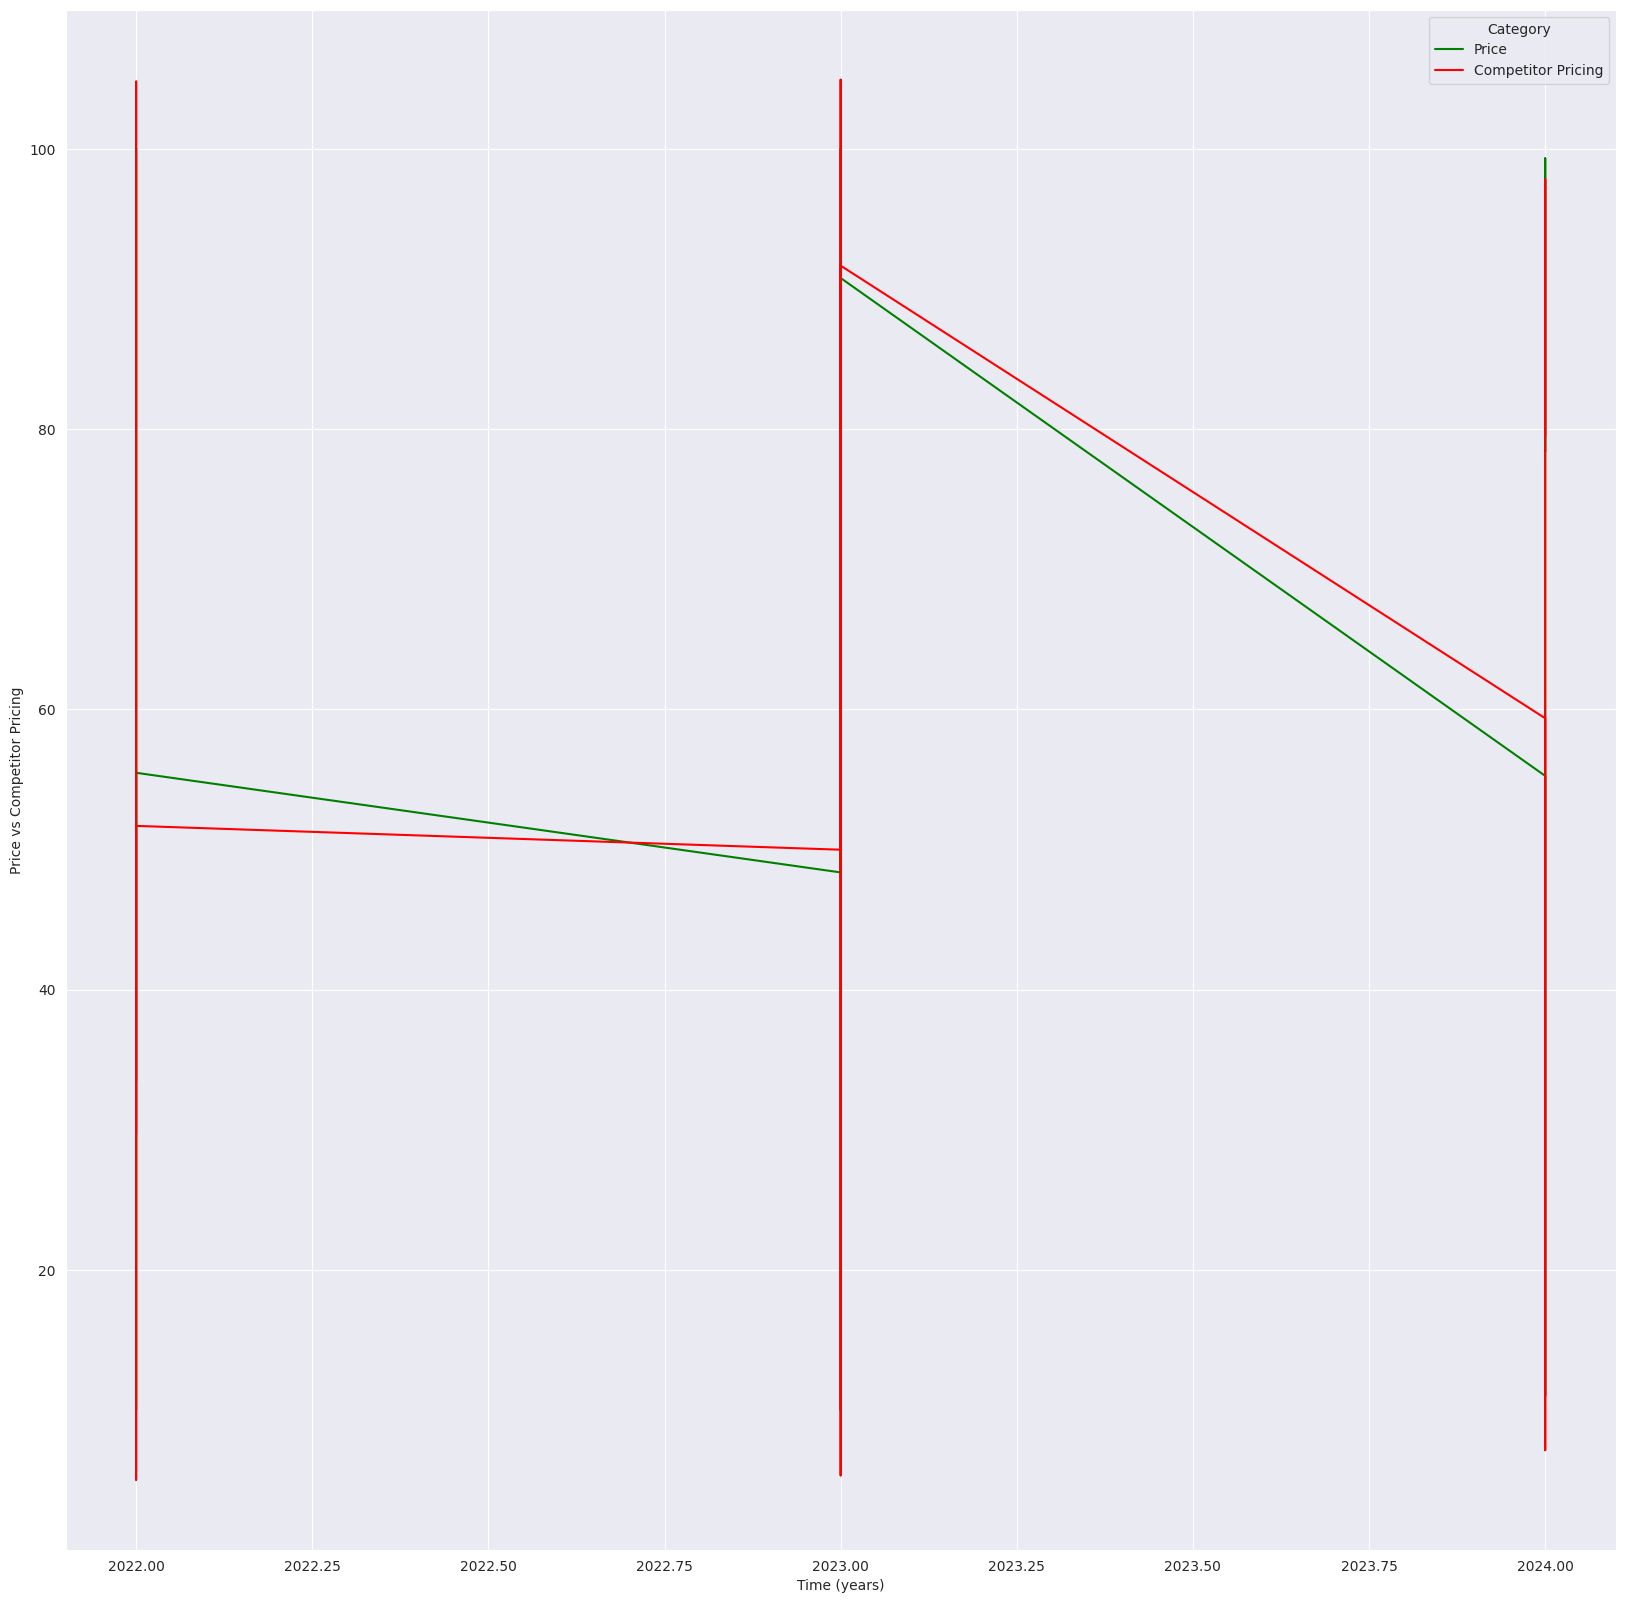

In [ ]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20, 20))

ax.plot(data["Year"], data["Price"], label="Price", color="green")
ax.plot(data["Year"], data["Competitor Pricing"], label="Competitor Pricing", color="red")

ax.set_xlabel("Time (years)")
ax.set_ylabel("Price vs Competitor Pricing")

plt.legend(title="Category")

plt.show()


## 2.2. Bivariate Analysis:
**Tập trung analyze giữa Quantity với các biến còn lại**

In [ ]:
data['Quantity']=data['Sales_Quantity']
data['Quantity']=data['Quantity'].astype(int)

In [ ]:
# Chuyển cột 'date' thành kiểu datetime nếu chưa có
data['date'] = pd.to_datetime(data['date'])

# Loại bỏ dữ liệu ngày 1/1/2024
data = data[data['date'] != '2024-01-01']


In [ ]:
data['date'].astype('datetime64[ns]')

0       2022-01-01
1       2022-01-01
2       2022-01-01
3       2022-01-01
4       2022-01-01
           ...    
72995   2023-12-31
72996   2023-12-31
72997   2023-12-31
72998   2023-12-31
72999   2023-12-31
Name: date, Length: 73000, dtype: datetime64[ns]

In [ ]:
print(data['date'].min())
print(data['date'].max())

2022-01-01 00:00:00
2023-12-31 00:00:00


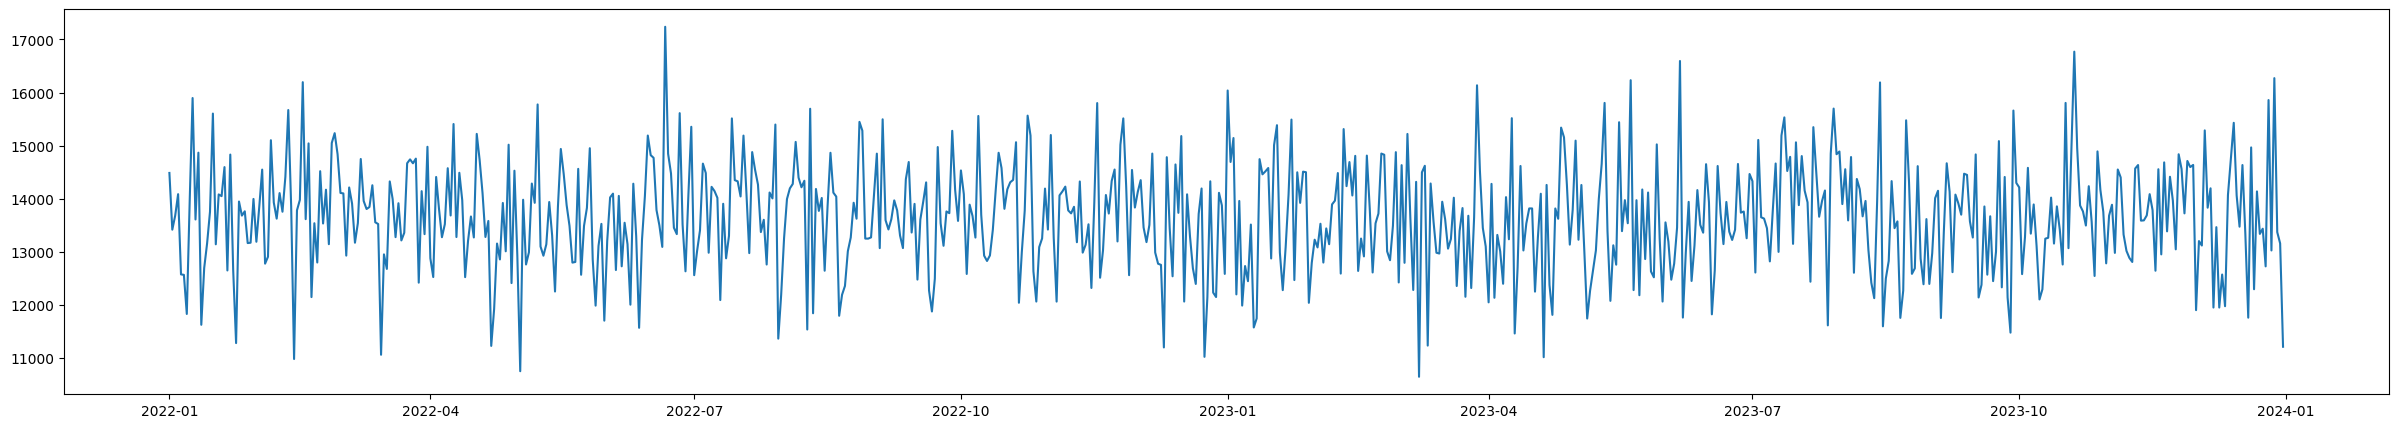

In [ ]:
df = data[['date', 'Sales_Quantity']]
df = df.groupby('date').agg({'Sales_Quantity':'sum'}).reset_index()

plt.figure(figsize=(30,5))
plt.plot(df.date, df.Sales_Quantity)
plt.show()

Quantity có tính mùa vụ rõ ràng

## 2.3. Multivariate Analysis

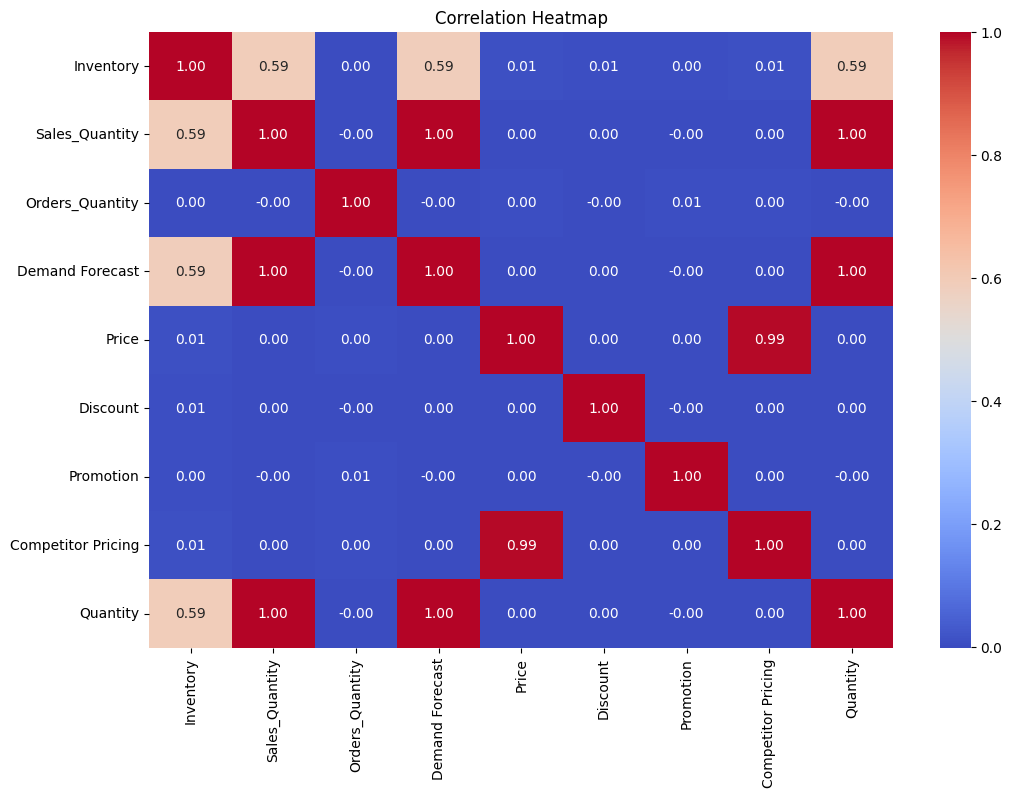

In [ ]:
# Select numeric columns
numeric_df = data.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


# **3.Pre-Processing**

In [ ]:
# 🔹 Chuyển Date về datetime
data["date"] = pd.to_datetime(data["date"])

# 🔹 Loại bỏ ngày 1/1/2024
df_grouped = data[data["date"] != "2024-01-01"]

## A. Time Series Technique

Bởi vì dữ liệu đã đẹp kh có null và duplicate nên kh có bước làm sạch đó, là những bước chọn biến và xử lý nó

In [ ]:
df_grouped = data[['date','Quantity']]

In [ ]:
# Group by Quantity and Month
df_grouped = df_grouped.groupby('date').sum()

# Result
df_grouped.head(10)
df_grouped = df_grouped.reset_index()
df_grouped


date  Quantity
0   2022-01-01     14484
1   2022-01-02     13415
2   2022-01-03     13681
3   2022-01-04     14084
4   2022-01-05     12572
..         ...       ...
725 2023-12-27     13023
726 2023-12-28     16271
727 2023-12-29     13368
728 2023-12-30     13156
729 2023-12-31     11208

[730 rows x 2 columns]

In [ ]:
df_grouped.dtypes

date        datetime64[ns]
Quantity             int64
dtype: object

# **4.Building Model HWES**



## MULTIPLICATIVE

In [ ]:
# Split train and test
train = df_grouped.iloc[:-int(len(df_grouped) * 0.2)]
test = df_grouped.iloc[-int(len(df_grouped) * 0.2):]

In [ ]:
# Import packages
import plotly.graph_objects as go
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

In [ ]:
# Import packages
!pip install statsmodels
!pip install plotly

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error


def plot_func(forecast1: list[float], title: str) -> go.Figure:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['Quantity'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['Quantity'], name='Test'))  # changed name to Test
    fig.add_trace(go.Scatter(x=test['date'], y=forecast1, name='Simple'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Quantity Volume')
    return fig #changed from fig.show() to just fig


# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['Quantity']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))
# Plot the forecasts
plot_simple = plot_func(forecasts_simple, "Simple Exponential Smoothing")  # modified function to be able to run
plot_simple.show()

def plot_func(forecast2: list[float], title: str) -> go.Figure:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['Quantity'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['Quantity'], name='Test'))  # changed name to Test
    fig.add_trace(go.Scatter(x=test['date'], y=forecast2, name="Holt's Linear"))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Quantity Volume')
    return fig #changed from fig.show() to just fig


# Fit Holt's model and get forecasts
model_holt = Holt(train['Quantity'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))
# Plot the forecasts
plot_holt=plot_func(forecasts_holt, "Holt's Linear Smoothing")  # modified function to be able to run
plot_holt.show()

def plot_func(forecast3: list[float], title: str) -> go.Figure:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['Quantity'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['Quantity'], name='Test'))  # changed name to Test
    fig.add_trace(go.Scatter(x=test['date'], y=forecast3, name="Holt's Linear"))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Quantity Volume')
    return fig #changed from fig.show() to just fig


# Fit Holt's model and get forecasts
model_holt_winters = ExponentialSmoothing(train['Quantity'], trend='mul',
                                          seasonal='mul', seasonal_periods=12)\
                                          .fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(len(test))
# Plot the forecasts
plot_holt_winters=plot_func(forecasts_holt_winters, "Holt-Winters Exponential Smoothing")  # modified function to be able to run
plot_holt_winters.show()

#calculate mape and rmse
ape = np.mean(np.abs((test['Quantity'].values - forecasts_holt_winters.values) / test['Quantity'].values)) * 100 # isolate quantity column
print("MAPE:", ape) # changed from mape to ape
rmse = np.sqrt(mean_squared_error(test['Quantity'].values, forecasts_holt_winters.values)) # isolate quantity column
print("RMSE:", rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



MAPE: 12.84944062138777
RMSE: 1942.3799092741929


In [ ]:
print(model_holt_winters.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Quantity   No. Observations:                  584
Model:             ExponentialSmoothing   SSE                      674487270.260
Optimized:                         True   AIC                           8184.384
Trend:                   Multiplicative   BIC                           8254.303
Seasonal:                Multiplicative   AICC                          8185.595
Seasonal Periods:                    12   Date:                 Tue, 11 Mar 2025
Box-Cox:                          False   Time:                         05:19:21
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0757143                alpha                 True
smoothing_trend          

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Chuẩn bị dữ liệu
# Chia lại dữ liệu: Train 90%, Test 10%
train = df_grouped.iloc[:-int(len(df_grouped) * 0.2)].copy()  # 80% dữ liệu
test = df_grouped.iloc[-int(len(df_grouped) * 0.2):].copy()  # 20% dữ liệu


train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

train_monthly = train.resample('ME', on='date').sum()
test_monthly = test.resample('ME', on='date').sum()

print(f"Số tháng trong train_monthly: {len(train_monthly)}")

# Chọn seasonal_periods hợp lệ
seasonal_periods = min(len(train_monthly) // 2, 12)

# Huấn luyện mô hình Holt-Winters (giảm hoặc bỏ seasonal nếu dữ liệu ít)
if seasonal_periods >= 2:
    model_holt_winters = ExponentialSmoothing(
        train_monthly['Quantity'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods
    ).fit(optimized=True)
else:
    model_holt_winters = ExponentialSmoothing(
        train_monthly['Quantity'], trend='mul', seasonal=None
    ).fit(optimized=True)

# Dự báo cho giai đoạn test + 12 tháng tiếp theo
forecast_steps = len(test_monthly) + 12
forecasts_holt_winters = model_holt_winters.forecast(forecast_steps)

# Tạo index cho phần dự báo 12 tháng sau
future_dates = pd.date_range(start=test_monthly.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')

# Gộp index test + forecast 12 tháng
forecast_index = test_monthly.index.append(future_dates)
forecasts_holt_winters = pd.Series(forecasts_holt_winters, index=forecast_index)

# Hàm vẽ biểu đồ
def plot_func(forecast3: pd.Series, title: str) -> None:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_monthly.index.strftime('%Y-%m'), y=train_monthly['Quantity'], name='Train'))
    fig.add_trace(go.Scatter(x=test_monthly.index.strftime('%Y-%m'), y=test_monthly['Quantity'], name='Test'))
    fig.add_trace(go.Scatter(x=forecast3.index.strftime('%Y-%m'), y=forecast3, name='Holt-Winters Forecast', line=dict(dash='dot')))

    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title, width=900, title_x=0.5, height=500,
                      xaxis_title='Year-Month', yaxis_title='Quantity Volume', xaxis=dict(tickangle=-45))
    return fig.show()

# Vẽ biểu đồ
plot_func(forecasts_holt_winters, "Holt-Winters Forecast (Test + 12 Months Ahead)")


Số tháng trong train_monthly: 20


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Chuẩn bị dữ liệu
train = df_grouped.iloc[:-int(len(df_grouped) * 0.2)].copy()  # 80% train
test = df_grouped.iloc[-int(len(df_grouped) * 0.2):].copy()  # 20% test

train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Tổng hợp theo tháng
train_monthly = train.resample('ME', on='date').sum()
test_monthly = test.resample('ME', on='date').sum()

# Chọn seasonal_periods hợp lệ
seasonal_periods = min(len(train_monthly) // 2, 12)

# Huấn luyện mô hình Holt-Winters
if seasonal_periods >= 2:
    model_holt_winters = ExponentialSmoothing(
        train_monthly['Quantity'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods
    ).fit(optimized=True)
else:
    model_holt_winters = ExponentialSmoothing(
        train_monthly['Quantity'], trend='mul', seasonal=None
    ).fit(optimized=True)

# Dự báo cho 20% test + 12 tháng tiếp theo
forecast_steps = len(test_monthly) + 12
forecasts_holt_winters = model_holt_winters.forecast(forecast_steps)

# Tạo index cho phần dự báo (test + 12 tháng)
future_dates = pd.date_range(start=test_monthly.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')
forecast_index = test_monthly.index.append(future_dates)
forecasts_holt_winters = pd.Series(forecasts_holt_winters, index=forecast_index)

# ✅ Tạo chuỗi actual đầy đủ (train + test)
actual_full = pd.concat([train_monthly, test_monthly])

# Hàm vẽ biểu đồ
def plot_forecast(actual: pd.DataFrame, forecast: pd.Series, title: str) -> None:
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=actual.index.strftime('%Y-%m'), y=actual['Quantity'], name='Actual', mode='lines'))
    fig.add_trace(go.Scatter(x=forecast.index.strftime('%Y-%m'), y=forecast, name='Forecast (Test + 12M)',
                              line=dict(dash='dot')))

    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title, width=900, title_x=0.5, height=500,
                      xaxis_title='Year-Month', yaxis_title='Quantity Volume', xaxis=dict(tickangle=-45))
    return fig.show()

# Vẽ biểu đồ
plot_forecast(actual_full, forecasts_holt_winters, "Actual vs Holt-Winters Forecast (Test + 12 Months)")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Chuẩn bị dữ liệu
df_grouped['date'] = pd.to_datetime(df_grouped['date'])
df_monthly = df_grouped.resample('ME', on='date').sum()

# Tạo tập dữ liệu dự báo từ 20% cuối của actual
forecast_start = int(len(df_monthly) * 0.8)  # Lấy 20% cuối
train = df_monthly.iloc[:forecast_start].copy()  # 80% đầu để huấn luyện
test = df_monthly.iloc[forecast_start:].copy()   # 20% cuối để kiểm tra

# Huấn luyện mô hình Holt-Winters
seasonal_periods = min(len(train) // 2, 12)  # Giới hạn tối đa 12 tháng
if seasonal_periods >= 2:
    model_holt_winters = ExponentialSmoothing(
        train['Quantity'], trend='mul', seasonal='mul', seasonal_periods=seasonal_periods
    ).fit(optimized=True)
else:
    model_holt_winters = ExponentialSmoothing(
        train['Quantity'], trend='mul', seasonal=None
    ).fit(optimized=True)

# Dự báo từ 20% cuối của actual + 12 tháng tiếp theo
forecast_steps = len(test) + 12
forecasts_holt_winters = model_holt_winters.forecast(forecast_steps)

# Tạo index cho phần dự báo
future_dates = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')
forecast_index = test.index.append(future_dates)
forecasts_holt_winters = pd.Series(forecasts_holt_winters, index=forecast_index)

# Vẽ biểu đồ với 2 đường: Actual và Forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_monthly.index.strftime('%Y-%m'), y=df_monthly['Quantity'], name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast_index.strftime('%Y-%m'), y=forecasts_holt_winters, name='Forecast', line=dict(dash='dot', color='red')))

fig.update_layout(template="simple_white", font=dict(size=18), title_text="Actual vs Forecast (20% Actual + 12 Months)",
                  width=900, title_x=0.5, height=500, xaxis_title='Year-Month', yaxis_title='Quantity Volume',
                  xaxis=dict(tickangle=-45))
fig.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



## ADDICTIVE

In [ ]:
data

date Store ID Region  Inventory  Sales_Quantity  Orders_Quantity  \
0     2022-01-01     S001  North        231             127               55   
1     2022-01-01     S001  South        204             150               66   
2     2022-01-01     S001   West        102              65               51   
3     2022-01-01     S001  North        469              61              164   
4     2022-01-01     S001   East        166              14              135   
...          ...      ...    ...        ...             ...              ...   
72995 2023-12-31     S005   East        153              54              185   
72996 2023-12-31     S005   West        376             162               52   
72997 2023-12-31     S005   West        225             111              140   
72998 2023-12-31     S005  North        235              17              126   
72999 2023-12-31     S005   East         64              40               99   

       Demand Forecast  Price  Discount Weather  Promotion  \
0               135.47  33.50        20   Rainy          0   
1               144.04  63.01        20   Sunny          0   
2                74.02  27.99        10   Sunny          1   
3                62.18  32.72        10  Cloudy          1   
4                 9.26  73.64         0   Sunny          0   
...                ...    ...       ...     ...        ...   
72995            57.91  88.78        15   Rainy          1   
72996           160.50  68.90        20   Snowy          0   
72997           127.94  51.65        20   Rainy          1   
72998             8.84  22.20        10  Cloudy          1   
72999            59.69  90.79         5   Snowy          1   

       Competitor Pricing Seasonality Product_ID     Category  Quantity  
0                   29.69      Autumn      G0001    Groceries       127  
1                   66.16      Autumn      T0002         Toys       150  
2                   31.32      Summer      T0003         Toys        65  
3                   34.74      Autumn      T0004         Toys        61  
4                   68.95      Summer      E0005  Electronics        14  
...                   ...         ...        ...          ...       ...  
72995               85.65      Summer      E0016  Electronics        54  
72996               72.83      Autumn      C0017     Clothing       162  
72997               50.49      Spring      C0018     Clothing       111  
72998               25.34      Autumn      T0019         Toys        17  
72999               91.67      Winter      F0020    Furniture        40  

[73000 rows x 16 columns]

In [ ]:
df_grouped = data[['date','Quantity']]

In [ ]:
# Group by Quantity and Month
df_grouped = df_grouped.groupby('date').sum()

# Result
df_grouped.head(10)
df_grouped = df_grouped.reset_index()
df_grouped


date  Quantity
0   2022-01-01     14484
1   2022-01-02     13415
2   2022-01-03     13681
3   2022-01-04     14084
4   2022-01-05     12572
..         ...       ...
725 2023-12-27     13023
726 2023-12-28     16271
727 2023-12-29     13368
728 2023-12-30     13156
729 2023-12-31     11208

[730 rows x 2 columns]

In [ ]:
train = df_grouped.iloc[:-int(len(df_grouped) * 0.2)]
test = df_grouped.iloc[-int(len(df_grouped) * 0.2):]

In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error


def plot_func(forecast1: list[float], title: str) -> go.Figure:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['Quantity'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['Quantity'], name='Test'))  # changed name to Test
    fig.add_trace(go.Scatter(x=test['date'], y=forecast1, name='Simple'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Quantity Volume')
    return fig #changed from fig.show() to just fig


# Fit simple model and get forecasts
model_simple = SimpleExpSmoothing(train['Quantity']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))
# Plot the forecasts
plot_simple = plot_func(forecasts_simple, "Simple Exponential Smoothing")  # modified function to be able to run
plot_simple.show()

def plot_func(forecast2: list[float], title: str) -> go.Figure:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['Quantity'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['Quantity'], name='Test'))  # changed name to Test
    fig.add_trace(go.Scatter(x=test['date'], y=forecast2, name="Holt's Linear"))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Quantity Volume')
    return fig #changed from fig.show() to just fig


# Fit Holt's model and get forecasts
model_holt = Holt(train['Quantity'], damped_trend=True).fit(optimized=True)
forecasts_holt = model_holt.forecast(len(test))
# Plot the forecasts
plot_holt=plot_func(forecasts_holt, "Holt's Linear Smoothing")  # modified function to be able to run
plot_holt.show()

def plot_func(forecast3: list[float], title: str) -> go.Figure:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['date'], y=train['Quantity'], name='Train'))
    fig.add_trace(go.Scatter(x=test['date'], y=test['Quantity'], name='Test'))  # changed name to Test
    fig.add_trace(go.Scatter(x=test['date'], y=forecast3, name="Holt's Linear"))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Quantity Volume')
    return fig #changed from fig.show() to just fig


# Fit Holt's model and get forecasts
model_holt_winters = ExponentialSmoothing(train['Quantity'], trend='add',
                                          seasonal='add', seasonal_periods=12)\
                                          .fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(len(test))
# Plot the forecasts
plot_holt_winters=plot_func(forecasts_holt_winters, "Holt-Winters Exponential Smoothing")  # modified function to be able to run
plot_holt_winters.show()

#calculate mape and rmse
ape = np.mean(np.abs((test['Quantity'].values - forecasts_simple.values) / test['Quantity'].values)) * 100 # isolate quantity column
print("MAPE:", ape) # changed from mape to ape
rmse = np.sqrt(mean_squared_error(test['Quantity'].values, forecasts_simple.values)) # isolate quantity column
print("RMSE:", rmse)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



MAPE: 6.918839540668585
RMSE: 1129.4113242782546


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Chuẩn bị dữ liệu
df_grouped['date'] = pd.to_datetime(df_grouped['date'])
df_monthly = df_grouped.resample('ME', on='date').sum()

# Tạo tập dữ liệu dự báo từ 20% cuối của actual
forecast_start = int(len(df_monthly) * 0.8)  # Lấy 20% cuối
train = df_monthly.iloc[:forecast_start].copy()  # 80% đầu để huấn luyện
test = df_monthly.iloc[forecast_start:].copy()   # 20% cuối để kiểm tra

# Huấn luyện mô hình Holt-Winters
seasonal_periods = min(len(train) // 2, 12)  # Giới hạn tối đa 12 tháng
if seasonal_periods >= 2:
    model_holt_winters = ExponentialSmoothing(
        train['Quantity'], trend='add', seasonal='add', seasonal_periods=seasonal_periods
    ).fit(optimized=True)
else:
    model_holt_winters = ExponentialSmoothing(
        train['Quantity'], trend='add', seasonal=None
    ).fit(optimized=True)

# Dự báo từ 20% cuối của actual + 12 tháng tiếp theo
forecast_steps = len(test) + 12
forecasts_holt_winters = model_holt_winters.forecast(forecast_steps)

# Tạo index cho phần dự báo
future_dates = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=12, freq='ME')
forecast_index = test.index.append(future_dates)
forecasts_holt_winters = pd.Series(forecasts_holt_winters, index=forecast_index)

# Vẽ biểu đồ với 2 đường: Actual và Forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_monthly.index.strftime('%Y-%m'), y=df_monthly['Quantity'], name='Actual', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=forecast_index.strftime('%Y-%m'), y=forecasts_holt_winters, name='Forecast', line=dict(dash='dot', color='red')))

fig.update_layout(template="simple_white", font=dict(size=18), title_text="Actual vs Forecast (20% Actual + 12 Months)",
                  width=900, title_x=0.5, height=500, xaxis_title='Year-Month', yaxis_title='Quantity Volume',
                  xaxis=dict(tickangle=-45))
fig.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [ ]:
print(model_holt_winters.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                 Quantity   No. Observations:                   19
Model:             ExponentialSmoothing   SSE                     2359348349.989
Optimized:                         True   AIC                            380.107
Trend:                         Additive   BIC                            392.385
Seasonal:                      Additive   AICC                           540.107
Seasonal Periods:                     9   Date:                 Sun, 02 Mar 2025
Box-Cox:                          False   Time:                         12:23:15
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0050000                alpha                 True
smoothing_trend          

## EVALUATION MULTIPLICATIVE & ADDICTIVE

In [ ]:
data

date Store ID Product ID     Category Region  Inventory  \
0     2022-01-01     S001      P0001    Groceries  North        231   
1     2022-01-01     S001      P0002         Toys  South        204   
2     2022-01-01     S001      P0003         Toys   West        102   
3     2022-01-01     S001      P0004         Toys  North        469   
4     2022-01-01     S001      P0005  Electronics   East        166   
...          ...      ...        ...          ...    ...        ...   
72995 2023-12-31     S005      P0016  Electronics   East        153   
72996 2023-12-31     S005      P0017     Clothing   West        376   
72997 2023-12-31     S005      P0018     Clothing   West        225   
72998 2023-12-31     S005      P0019         Toys  North        235   
72999 2023-12-31     S005      P0020    Furniture   East         64   

       Sales_Quantity  Orders_Quantity  Demand Forecast  Price  Discount  \
0                 127               55           135.47  33.50        20   
1                 150               66           144.04  63.01        20   
2                  65               51            74.02  27.99        10   
3                  61              164            62.18  32.72        10   
4                  14              135             9.26  73.64         0   
...               ...              ...              ...    ...       ...   
72995              54              185            57.91  88.78        15   
72996             162               52           160.50  68.90        20   
72997             111              140           127.94  51.65        20   
72998              17              126             8.84  22.20        10   
72999              40               99            59.69  90.79         5   

      Weather  Promotion  Competitor Pricing Seasonality  Quantity  
0       Rainy          0               29.69      Autumn       127  
1       Sunny          0               66.16      Autumn       150  
2       Sunny          1               31.32      Summer        65  
3      Cloudy          1               34.74      Autumn        61  
4       Sunny          0               68.95      Summer        14  
...       ...        ...                 ...         ...       ...  
72995   Rainy          1               85.65      Summer        54  
72996   Snowy          0               72.83      Autumn       162  
72997   Rainy          1               50.49      Spring       111  
72998  Cloudy          1               25.34      Autumn        17  
72999   Snowy          1               91.67      Winter        40  

[73000 rows x 16 columns]

In [ ]:
df_grouped = data[['date','Quantity']]

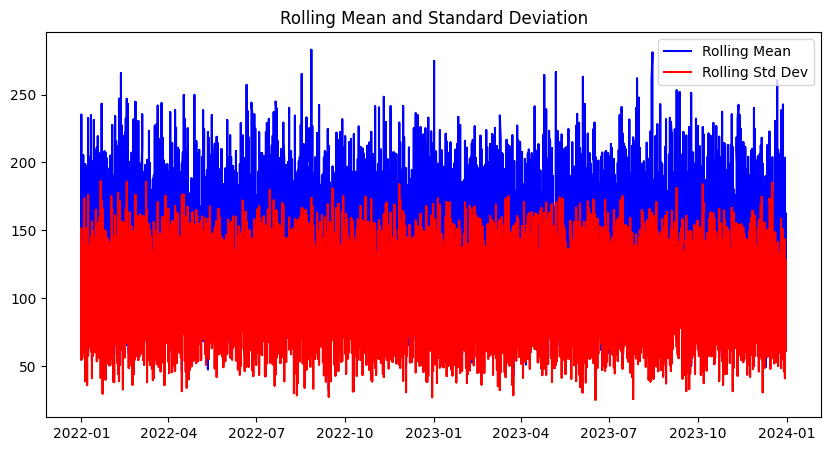

In [ ]:
import numpy as np
import pandas as pd

# Tính trung bình trượt (rolling mean) và độ lệch chuẩn trượt (rolling std)
rolling_mean = df['Quantity'].rolling(window=12).mean()
rolling_std = df['Quantity'].rolling(window=12).std()

# Vẽ biểu đồ
plt.figure(figsize=(10,5))
plt.plot(df['date'], rolling_mean, label="Rolling Mean", color="blue")
plt.plot(df['date'], rolling_std, label="Rolling Std Dev", color="red")
plt.legend()
plt.title("Rolling Mean and Standard Deviation")
plt.show()


<ipython-input-54-9e0802bb1ab8>:10: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



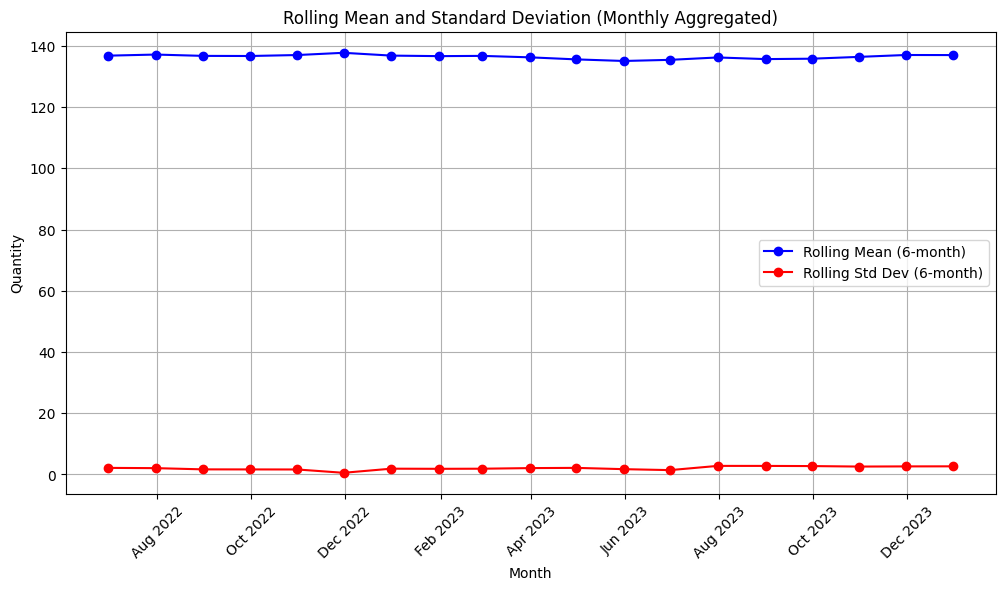

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Chuyển cột date về dạng datetime
df['date'] = pd.to_datetime(df['date'])

# Gộp dữ liệu theo tháng (lấy trung bình mỗi tháng)
df_monthly = df.resample('M', on='date').mean()

# Tính rolling mean và rolling std dựa trên dữ liệu tháng
rolling_mean = df_monthly['Quantity'].rolling(window=6).mean()  # Dùng cửa sổ 6 tháng
rolling_std = df_monthly['Quantity'].rolling(window=6).std()

# Vẽ biểu đồ
plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, rolling_mean, label="Rolling Mean (6-month)", color="blue", marker='o')
plt.plot(df_monthly.index, rolling_std, label="Rolling Std Dev (6-month)", color="red", marker='o')

# Cài đặt trục x hiển thị theo tháng
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Hiển thị 2 tháng 1 lần
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Định dạng là 'Jan 2023', 'Feb 2023', ...

plt.xticks(rotation=45)  # Xoay nhãn để dễ đọc
plt.legend()
plt.title("Rolling Mean and Standard Deviation (Monthly Aggregated)")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Tính trung bình và phương sai theo giai đoạn
df_grouped = data.groupby('date')['Quantity'].agg(['mean', 'var'])

# Kiểm tra mối quan hệ giữa mean và variance
correlation = df_grouped['mean'].corr(df_grouped['var'])
print(f"Hệ số tương quan giữa trung bình và phương sai: {correlation:.2f}")


Hệ số tương quan giữa trung bình và phương sai: 0.59


# **5.FORCASTING EACH PRODUCT ID**

In [ ]:
data

date Store ID Region  Inventory  Sales_Quantity  Orders_Quantity  \
0     2022-01-01     S001  North        231             127               55   
1     2022-01-01     S001  South        204             150               66   
2     2022-01-01     S001   West        102              65               51   
3     2022-01-01     S001  North        469              61              164   
4     2022-01-01     S001   East        166              14              135   
...          ...      ...    ...        ...             ...              ...   
72995 2023-12-31     S005   East        153              54              185   
72996 2023-12-31     S005   West        376             162               52   
72997 2023-12-31     S005   West        225             111              140   
72998 2023-12-31     S005  North        235              17              126   
72999 2023-12-31     S005   East         64              40               99   

       Demand Forecast  Price  Discount Weather  Promotion  \
0               135.47  33.50        20   Rainy          0   
1               144.04  63.01        20   Sunny          0   
2                74.02  27.99        10   Sunny          1   
3                62.18  32.72        10  Cloudy          1   
4                 9.26  73.64         0   Sunny          0   
...                ...    ...       ...     ...        ...   
72995            57.91  88.78        15   Rainy          1   
72996           160.50  68.90        20   Snowy          0   
72997           127.94  51.65        20   Rainy          1   
72998             8.84  22.20        10  Cloudy          1   
72999            59.69  90.79         5   Snowy          1   

       Competitor Pricing Seasonality Product_ID     Category  Quantity  
0                   29.69      Autumn      G0001    Groceries       127  
1                   66.16      Autumn      T0002         Toys       150  
2                   31.32      Summer      T0003         Toys        65  
3                   34.74      Autumn      T0004         Toys        61  
4                   68.95      Summer      E0005  Electronics        14  
...                   ...         ...        ...          ...       ...  
72995               85.65      Summer      E0016  Electronics        54  
72996               72.83      Autumn      C0017     Clothing       162  
72997               50.49      Spring      C0018     Clothing       111  
72998               25.34      Autumn      T0019         Toys        17  
72999               91.67      Winter      F0020    Furniture        40  

[73000 rows x 16 columns]

In [ ]:
df_grouped = data[['date','Sales_Quantity','Product_ID']]

In [ ]:
df_grouped

date  Sales_Quantity Product_ID
0     2022-01-01             127      G0001
1     2022-01-01             150      T0002
2     2022-01-01              65      T0003
3     2022-01-01              61      T0004
4     2022-01-01              14      E0005
...          ...             ...        ...
72995 2023-12-31              54      E0016
72996 2023-12-31             162      C0017
72997 2023-12-31             111      C0018
72998 2023-12-31              17      T0019
72999 2023-12-31              40      F0020

[73000 rows x 3 columns]

In [ ]:
df_grouped["Product_ID"].unique()

array(['G0001', 'T0002', 'T0003', 'T0004', 'E0005', 'G0006', 'F0007',
       'C0008', 'E0009', 'T0010', 'F0011', 'C0012', 'T0013', 'C0014',
       'C0015', 'E0016', 'T0017', 'C0018', 'C0019', 'T0020', 'C0002',
       'F0003', 'T0005', 'F0006', 'G0007', 'E0008', 'C0009', 'E0010',
       'G0011', 'G0012', 'C0013', 'E0014', 'T0015', 'T0016', 'G0017',
       'G0018', 'T0019', 'T0001', 'E0002', 'G0003', 'C0005', 'E0007',
       'T0008', 'G0009', 'G0010', 'T0011', 'E0012', 'F0013', 'G0016',
       'C0017', 'T0018', 'E0020', 'C0003', 'G0004', 'G0005', 'E0006',
       'F0008', 'F0009', 'E0011', 'E0017', 'G0019', 'C0020', 'E0003',
       'F0004', 'C0007', 'C0010', 'F0015', 'C0016', 'F0018', 'T0009',
       'F0012', 'E0015', 'F0017', 'F0019', 'E0001', 'F0002', 'T0012',
       'F0014', 'G0002', 'F0005', 'F0010', 'E0013', 'T0014', 'T0006',
       'C0006', 'E0004', 'G0008', 'T0007', 'C0011', 'G0013', 'G0014',
       'G0020', 'C0001', 'C0004', 'E0018', 'G0015', 'F0020', 'F0001',
       'F0016', 'E00

In [ ]:
import pandas as pd

# Chuyển cột Date về dạng datetime
df_grouped["date"] = pd.to_datetime(df_grouped["date"])



# Nhóm dữ liệu theo Year_Month và Category, rồi tính tổng Sales_Quantity
df_summary = df_grouped.groupby(["date", "Product_ID"])["Sales_Quantity"].sum().reset_index()

# Chuyển Year_Month về dạng chuỗi để hiển thị tốt hơn


# Hiển thị kết quả
print(df_summary.head())

        date Product_ID  Sales_Quantity
0 2022-01-01      C0002             619
1 2022-01-01      C0003             344
2 2022-01-01      C0005             346
3 2022-01-01      C0007             131
4 2022-01-01      C0008             312


<ipython-input-102-edb945d059ee>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import pandas as pd

# 🔹 Đảm bảo Date là kiểu datetime
df_grouped = df_grouped.copy()  # Tạo bản sao để tránh SettingWithCopyWarning
df_grouped["date"] = pd.to_datetime(df_grouped["date"])

# 🔹 Nhóm theo Year_Month, Category và Product ID, tính tổng Sales_Quantity
df_summary = df_grouped.groupby(["date", "Product_ID"])["Sales_Quantity"].sum().reset_index()

# 🛠️ Tạo Dictionary chứa DataFrame cho từng Product ID
product_ids = df_summary["Product_ID"].unique()
df_product_dict = {pid: df_summary[df_summary["Product_ID"] == pid].reset_index(drop=True) for pid in product_ids}

# 🔍 Kiểm tra thử (ví dụ: sản phẩm "P0001")
print(df_product_dict["E0001"].head())

        date Product_ID  Sales_Quantity
0 2022-01-02      E0001             365
1 2022-01-03      E0001               5
2 2022-01-05      E0001              53
3 2022-01-06      E0001              37
4 2022-01-09      E0001             350


In [ ]:
import pandas as pd

# 🔹 Đảm bảo 'date' là kiểu datetime
df_grouped = df_grouped.copy()  # Tạo bản sao để tránh SettingWithCopyWarning
df_grouped["date"] = pd.to_datetime(df_grouped["date"])

# 🔹 Tạo cột 'Year_Month' chỉ chứa năm và tháng
df_grouped["Year_Month"] = df_grouped["date"].dt.to_period("M")  # Dạng Period YYYY-MM

# 🔹 Nhóm theo Year_Month và Product ID, tính tổng Sales_Quantity
df_summary = df_grouped.groupby(["Year_Month", "Product_ID"])["Sales_Quantity"].sum().reset_index()

# 🛠️ Tạo Dictionary chứa DataFrame cho từng Product ID
product_ids = df_summary["Product_ID"].unique()
df_product_dict = {pid: df_summary[df_summary["Product_ID"] == pid].reset_index(drop=True) for pid in product_ids}

# 🔍 Kiểm tra thử (ví dụ: sản phẩm "P0001")
print(df_product_dict["E0001"].head())


  Year_Month Product_ID  Sales_Quantity
0    2022-01      E0001            2984
1    2022-02      E0001            3706
2    2022-03      E0001            3385
3    2022-04      E0001            2521
4    2022-05      E0001            4647


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# 🔹 Chuyển Date về datetime
df_grouped["date"] = pd.to_datetime(df_grouped["date"])

# 🔹 Loại bỏ ngày 1/1/2024
df_grouped = df_grouped[df_grouped["date"] != "2024-01-01"]

# 🔹 Nhóm dữ liệu theo (date, Product ID) và tính tổng Sales_Quantity
df_summary = df_grouped.groupby(["date", "Product_ID"])["Sales_Quantity"].sum().reset_index()

# 🔹 Lấy danh sách 20 Product ID
product_ids = df_summary["Product_ID"].unique()[:20]

# 🔹 Lưu kết quả đánh giá (MAPE, RMSE)
results = []

# 🔹 Chạy vòng lặp cho từng Product ID
for product_id in product_ids:
    print(f"▶ Đang xử lý Product ID: {product_id}")

    # 📌 Lọc dữ liệu cho Product ID hiện tại
    X = df_summary[df_summary["Product_ID"] == product_id].sort_values(by="date")

    # 📌 Chia train-test (80-20)
    train_size = int(len(X) * 0.8)
    trainset, testset = X.iloc[:train_size], X.iloc[train_size:]

    # 📌 Reset index
    train = trainset.reset_index(drop=True)
    test = testset.reset_index(drop=True)

    # 📌 Hàm vẽ dự báo
    def plot_forecast(forecast: list[float], title: str) -> go.Figure:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=train["date"], y=train["Sales_Quantity"], name="Train"))
        fig.add_trace(go.Scatter(x=test["date"], y=test["Sales_Quantity"], name="Test"))
        fig.add_trace(go.Scatter(x=test["date"], y=forecast, name=title))
        fig.update_layout(template="simple_white", font=dict(size=18),
                          title_text=f"{title} - Product {product_id}",
                          width=700, title_x=0.5, height=400, xaxis_title="Date",
                          yaxis_title="Sales_Quantity")
        return fig

    # 📌 Simple Exponential Smoothing
    model_simple = SimpleExpSmoothing(train["Sales_Quantity"]).fit(optimized=True)
    forecasts_simple = model_simple.forecast(len(test))

    # 📌 Holt’s Linear Smoothing
    model_holt = Holt(train["Sales_Quantity"], damped_trend=True).fit(optimized=True)
    forecasts_holt = model_holt.forecast(len(test))

    # 📌 Holt-Winters Exponential Smoothing
    seasonal_periods = min(len(train) // 2, 12)  # Ít nhất 2 chu kỳ mùa vụ
    model_holt_winters = ExponentialSmoothing(train["Sales_Quantity"], trend="add",
                                              seasonal="add", seasonal_periods=seasonal_periods).fit(optimized=True)
    forecasts_holt_winters = model_holt_winters.forecast(len(test))

    # 📌 Đánh giá hiệu suất
    mape = np.mean(np.abs((test["Sales_Quantity"].values - forecasts_holt_winters.values) / test["Sales_Quantity"].values)) * 100
    rmse = np.sqrt(mean_squared_error(test["Sales_Quantity"].values, forecasts_holt_winters.values))

    print(f"✔ Product {product_id} - MAPE: {mape:.2f}%, RMSE: {rmse:.2f}")

    # 📌 Lưu kết quả
    results.append({"Product_ID": product_id, "MAPE": mape, "RMSE": rmse})

    # 📌 Vẽ biểu đồ dự báo
    plot_forecast(forecasts_holt_winters, "Holt-Winters Exponential Smoothing").show()

# 📌 Chuyển kết quả thành DataFrame
df_results = pd.DataFrame(results)
print(df_results)


▶ Đang xử lý Product ID: C0002
✔ Product C0002 - MAPE: 364.87%, RMSE: 152.19


▶ Đang xử lý Product ID: C0003
✔ Product C0003 - MAPE: 238.76%, RMSE: 164.04


▶ Đang xử lý Product ID: C0005
✔ Product C0005 - MAPE: inf%, RMSE: 149.28


<ipython-input-107-f31788ad472b>:64: RuntimeWarning:

divide by zero encountered in divide



▶ Đang xử lý Product ID: C0007
✔ Product C0007 - MAPE: 233.29%, RMSE: 138.01


▶ Đang xử lý Product ID: C0008
✔ Product C0008 - MAPE: 531.92%, RMSE: 151.54


▶ Đang xử lý Product ID: C0009
✔ Product C0009 - MAPE: 424.44%, RMSE: 173.28


▶ Đang xử lý Product ID: C0010
✔ Product C0010 - MAPE: 257.26%, RMSE: 139.78


▶ Đang xử lý Product ID: C0012
✔ Product C0012 - MAPE: 454.01%, RMSE: 146.26


▶ Đang xử lý Product ID: C0013
✔ Product C0013 - MAPE: 243.32%, RMSE: 155.60


▶ Đang xử lý Product ID: C0014
✔ Product C0014 - MAPE: inf%, RMSE: 178.90


<ipython-input-107-f31788ad472b>:64: RuntimeWarning:

divide by zero encountered in divide



▶ Đang xử lý Product ID: C0015
✔ Product C0015 - MAPE: 178.01%, RMSE: 159.75


▶ Đang xử lý Product ID: C0016
✔ Product C0016 - MAPE: 221.55%, RMSE: 152.77


▶ Đang xử lý Product ID: C0017
✔ Product C0017 - MAPE: inf%, RMSE: 166.59


<ipython-input-107-f31788ad472b>:64: RuntimeWarning:

divide by zero encountered in divide



▶ Đang xử lý Product ID: C0018
✔ Product C0018 - MAPE: 324.32%, RMSE: 187.93


▶ Đang xử lý Product ID: C0019
✔ Product C0019 - MAPE: inf%, RMSE: 193.29


<ipython-input-107-f31788ad472b>:64: RuntimeWarning:

divide by zero encountered in divide



▶ Đang xử lý Product ID: C0020
✔ Product C0020 - MAPE: 465.44%, RMSE: 158.62


▶ Đang xử lý Product ID: E0002
✔ Product E0002 - MAPE: 323.97%, RMSE: 161.57


▶ Đang xử lý Product ID: E0003
✔ Product E0003 - MAPE: 216.61%, RMSE: 146.96


▶ Đang xử lý Product ID: E0005
✔ Product E0005 - MAPE: 283.09%, RMSE: 147.63


▶ Đang xử lý Product ID: E0006
✔ Product E0006 - MAPE: inf%, RMSE: 234.78


<ipython-input-107-f31788ad472b>:64: RuntimeWarning:

divide by zero encountered in divide



   Product_ID        MAPE        RMSE
0       C0002  364.868454  152.187234
1       C0003  238.758936  164.035586
2       C0005         inf  149.283642
3       C0007  233.287986  138.006936
4       C0008  531.918185  151.540984
5       C0009  424.443602  173.276505
6       C0010  257.256708  139.777553
7       C0012  454.007576  146.260010
8       C0013  243.321115  155.601758
9       C0014         inf  178.903210
10      C0015  178.008209  159.751488
11      C0016  221.552566  152.768755
12      C0017         inf  166.586138
13      C0018  324.323399  187.933623
14      C0019         inf  193.294819
15      C0020  465.435896  158.618334
16      E0002  323.974339  161.565855
17      E0003  216.612900  146.963229
18      E0005  283.088914  147.631897
19      E0006         inf  234.776505


In [ ]:
print("Danh sách Product_ID được sử dụng:", product_ids)
print("Tổng số Product_ID:", len(product_ids))


Danh sách Product_ID được sử dụng: ['C0002' 'C0003' 'C0005' 'C0007' 'C0008' 'C0009' 'C0010' 'C0012' 'C0013'
 'C0014' 'C0015' 'C0016' 'C0017' 'C0018' 'C0019' 'C0020' 'E0002' 'E0003'
 'E0005' 'E0006']
Tổng số Product_ID: 20


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# 🔹 Chuyển Date về datetime
df_grouped["date"] = pd.to_datetime(df_grouped["date"])

# 🔹 Loại bỏ ngày 1/1/2024
df_grouped = df_grouped[df_grouped["date"] != "2024-01-01"]

# 🔹 Nhóm dữ liệu theo (date, Product ID) và tính tổng Sales_Quantity
df_summary = df_grouped.groupby(["date", "Product_ID"])["Sales_Quantity"].sum().reset_index()

# 🔹 Lấy danh sách 20 Product ID đầu tiên
product_ids = df_summary["Product_ID"].unique()

# 🔹 Lưu kết quả đánh giá (MAPE, RMSE)
results = []

# 🔹 Chạy vòng lặp cho từng Product ID
for product_id in product_ids:
    print(f"▶ Đang xử lý Product ID: {product_id}")

    # 📌 Lọc dữ liệu cho Product ID hiện tại
    X = df_summary[df_summary["Product_ID"] == product_id].sort_values(by="date")

    # 📌 Định dạng lại DateTime
    X["date"] = pd.to_datetime(X["date"])
    X = X.set_index("date").resample("ME").sum()  # Resample theo tháng

    # 📌 Chia tập train - test (80-20)
    train_size = int(len(X) * 0.8)
    train = X.iloc[:train_size].copy()
    test = X.iloc[train_size:].copy()

    # 📌 Xác định số chu kỳ mùa vụ hợp lý
    seasonal_periods = min(len(train) // 2, 12)  # Ít nhất 2 chu kỳ mùa vụ

    # 📌 Train mô hình Holt-Winters
    if seasonal_periods >= 2:
        model_holt_winters = ExponentialSmoothing(
            train["Sales_Quantity"], trend="add", seasonal="add", seasonal_periods=seasonal_periods
        ).fit(optimized=True)
    else:
        model_holt_winters = ExponentialSmoothing(
            train["Sales_Quantity"], trend="mul", seasonal=None
        ).fit(optimized=True)

    # 📌 Dự báo từ tập test + 12 tháng tiếp theo
    forecast_steps = len(test) + 12
    forecasts_holt_winters = model_holt_winters.forecast(forecast_steps)

    # 📌 Tạo index cho phần dự báo
    future_dates = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=12, freq="ME")
    forecast_index = test.index.append(future_dates)
    forecasts_holt_winters = pd.Series(forecasts_holt_winters, index=forecast_index)

    # 📌 Đánh giá hiệu suất
    actual_values = test["Sales_Quantity"].values
    predicted_values = forecasts_holt_winters[:len(test)].values  # Chỉ lấy phần tương ứng với test set

    mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))

    print(f"✔ Product {product_id} - MAPE: {mape:.2f}%, RMSE: {rmse:.2f}")

    # 📌 Lưu kết quả
    results.append({"Product_ID": product_id, "MAPE": mape, "RMSE": rmse})

    # 📌 Vẽ biểu đồ dự báo
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X.index.strftime("%Y-%m"), y=X["Sales_Quantity"],
                             name="Actual", line=dict(color="blue")))
    fig.add_trace(go.Scatter(x=forecast_index.strftime("%Y-%m"), y=forecasts_holt_winters,
                             name="Forecast", line=dict(dash="dot", color="red")))

    fig.update_layout(template="simple_white", font=dict(size=18),
                      title_text=f"Actual vs Forecast - Product {product_id}",
                      width=900, title_x=0.5, height=500, xaxis_title="Year-Month",
                      yaxis_title="Sales Quantity", xaxis=dict(tickangle=-45))

    fig.show()

# 📌 Chuyển kết quả thành DataFrame để xem tổng quan
df_results = pd.DataFrame(results)
print(df_results)


▶ Đang xử lý Product ID: C0002
✔ Product C0002 - MAPE: 19.03%, RMSE: 719.51


▶ Đang xử lý Product ID: C0003
✔ Product C0003 - MAPE: 19.26%, RMSE: 861.59


▶ Đang xử lý Product ID: C0005
✔ Product C0005 - MAPE: 22.16%, RMSE: 955.84


▶ Đang xử lý Product ID: C0007
✔ Product C0007 - MAPE: 29.93%, RMSE: 1283.72


▶ Đang xử lý Product ID: C0008
✔ Product C0008 - MAPE: 25.96%, RMSE: 1358.03


▶ Đang xử lý Product ID: C0009
✔ Product C0009 - MAPE: 17.52%, RMSE: 854.47


▶ Đang xử lý Product ID: C0010
✔ Product C0010 - MAPE: 28.78%, RMSE: 1148.36


▶ Đang xử lý Product ID: C0012
✔ Product C0012 - MAPE: 42.20%, RMSE: 1535.75


▶ Đang xử lý Product ID: C0013
✔ Product C0013 - MAPE: 31.47%, RMSE: 1449.82


▶ Đang xử lý Product ID: C0014
✔ Product C0014 - MAPE: 21.86%, RMSE: 1048.81


▶ Đang xử lý Product ID: C0015
✔ Product C0015 - MAPE: 11.76%, RMSE: 603.01


▶ Đang xử lý Product ID: C0016
✔ Product C0016 - MAPE: 17.63%, RMSE: 1094.73


▶ Đang xử lý Product ID: C0017
✔ Product C0017 - MAPE: 14.66%, RMSE: 699.41


▶ Đang xử lý Product ID: C0018
✔ Product C0018 - MAPE: 28.94%, RMSE: 1660.44


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



▶ Đang xử lý Product ID: C0019
✔ Product C0019 - MAPE: 17.03%, RMSE: 650.10


▶ Đang xử lý Product ID: C0020
✔ Product C0020 - MAPE: 30.24%, RMSE: 1278.55


▶ Đang xử lý Product ID: E0002
✔ Product E0002 - MAPE: 25.35%, RMSE: 1354.51


▶ Đang xử lý Product ID: E0003
✔ Product E0003 - MAPE: 26.91%, RMSE: 1116.49


▶ Đang xử lý Product ID: E0005
✔ Product E0005 - MAPE: 13.15%, RMSE: 549.75


▶ Đang xử lý Product ID: E0006
✔ Product E0006 - MAPE: 8.05%, RMSE: 387.56


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



▶ Đang xử lý Product ID: E0007
✔ Product E0007 - MAPE: 25.92%, RMSE: 1293.57


▶ Đang xử lý Product ID: E0008
✔ Product E0008 - MAPE: 27.42%, RMSE: 1549.48


▶ Đang xử lý Product ID: E0009
✔ Product E0009 - MAPE: 24.38%, RMSE: 1342.73


▶ Đang xử lý Product ID: E0010
✔ Product E0010 - MAPE: 54.70%, RMSE: 2496.10


▶ Đang xử lý Product ID: E0011
✔ Product E0011 - MAPE: 22.27%, RMSE: 1259.06


▶ Đang xử lý Product ID: E0012
✔ Product E0012 - MAPE: 26.13%, RMSE: 1116.63


▶ Đang xử lý Product ID: E0014
✔ Product E0014 - MAPE: 24.34%, RMSE: 1618.04


▶ Đang xử lý Product ID: E0016
✔ Product E0016 - MAPE: 27.78%, RMSE: 1474.91


▶ Đang xử lý Product ID: E0017
✔ Product E0017 - MAPE: 17.33%, RMSE: 877.18


▶ Đang xử lý Product ID: E0020
✔ Product E0020 - MAPE: 19.90%, RMSE: 1232.10


▶ Đang xử lý Product ID: F0003
✔ Product F0003 - MAPE: 22.01%, RMSE: 984.46


▶ Đang xử lý Product ID: F0004
✔ Product F0004 - MAPE: 37.34%, RMSE: 1592.58


▶ Đang xử lý Product ID: F0006
✔ Product F0006 - MAPE: 20.35%, RMSE: 952.37


▶ Đang xử lý Product ID: F0007
✔ Product F0007 - MAPE: 10.92%, RMSE: 816.43


▶ Đang xử lý Product ID: F0008
✔ Product F0008 - MAPE: 24.20%, RMSE: 1102.09


▶ Đang xử lý Product ID: F0009
✔ Product F0009 - MAPE: 21.64%, RMSE: 1063.32


▶ Đang xử lý Product ID: F0011
✔ Product F0011 - MAPE: 30.13%, RMSE: 1733.30


▶ Đang xử lý Product ID: F0013
✔ Product F0013 - MAPE: 12.94%, RMSE: 713.49


▶ Đang xử lý Product ID: F0015
✔ Product F0015 - MAPE: 24.95%, RMSE: 1187.50


▶ Đang xử lý Product ID: F0018
✔ Product F0018 - MAPE: 20.48%, RMSE: 1127.07


▶ Đang xử lý Product ID: G0001
✔ Product G0001 - MAPE: 61.65%, RMSE: 2388.60


▶ Đang xử lý Product ID: G0003
✔ Product G0003 - MAPE: 30.50%, RMSE: 1484.19


▶ Đang xử lý Product ID: G0004
✔ Product G0004 - MAPE: 48.88%, RMSE: 1536.98


▶ Đang xử lý Product ID: G0005
✔ Product G0005 - MAPE: 28.13%, RMSE: 1463.66


▶ Đang xử lý Product ID: G0006
✔ Product G0006 - MAPE: 23.18%, RMSE: 1257.54


▶ Đang xử lý Product ID: G0007
✔ Product G0007 - MAPE: 34.30%, RMSE: 1540.51


▶ Đang xử lý Product ID: G0009
✔ Product G0009 - MAPE: 8.80%, RMSE: 434.62


▶ Đang xử lý Product ID: G0010
✔ Product G0010 - MAPE: 29.84%, RMSE: 1326.51


▶ Đang xử lý Product ID: G0011
✔ Product G0011 - MAPE: 65.08%, RMSE: 2184.65


▶ Đang xử lý Product ID: G0012
✔ Product G0012 - MAPE: 26.28%, RMSE: 1001.40


▶ Đang xử lý Product ID: G0016
✔ Product G0016 - MAPE: 19.88%, RMSE: 1301.12


▶ Đang xử lý Product ID: G0017
✔ Product G0017 - MAPE: 20.97%, RMSE: 958.19


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



▶ Đang xử lý Product ID: G0018
✔ Product G0018 - MAPE: 19.99%, RMSE: 902.33


▶ Đang xử lý Product ID: G0019
✔ Product G0019 - MAPE: 16.72%, RMSE: 811.69


▶ Đang xử lý Product ID: T0001
✔ Product T0001 - MAPE: 31.00%, RMSE: 1131.54


▶ Đang xử lý Product ID: T0002
✔ Product T0002 - MAPE: 19.45%, RMSE: 812.98


▶ Đang xử lý Product ID: T0003
✔ Product T0003 - MAPE: 20.48%, RMSE: 1174.98


▶ Đang xử lý Product ID: T0004
✔ Product T0004 - MAPE: 7.68%, RMSE: 471.20


▶ Đang xử lý Product ID: T0005
✔ Product T0005 - MAPE: 21.87%, RMSE: 929.90


▶ Đang xử lý Product ID: T0008
✔ Product T0008 - MAPE: 19.30%, RMSE: 765.76


▶ Đang xử lý Product ID: T0010
✔ Product T0010 - MAPE: 16.07%, RMSE: 762.72


▶ Đang xử lý Product ID: T0011
✔ Product T0011 - MAPE: 23.58%, RMSE: 1116.06


▶ Đang xử lý Product ID: T0013
✔ Product T0013 - MAPE: 25.84%, RMSE: 1218.40


▶ Đang xử lý Product ID: T0015
✔ Product T0015 - MAPE: 31.83%, RMSE: 1362.84


▶ Đang xử lý Product ID: T0016
✔ Product T0016 - MAPE: 37.72%, RMSE: 1651.51


▶ Đang xử lý Product ID: T0017
✔ Product T0017 - MAPE: 16.33%, RMSE: 868.61


▶ Đang xử lý Product ID: T0018
✔ Product T0018 - MAPE: 31.82%, RMSE: 1169.51


▶ Đang xử lý Product ID: T0019
✔ Product T0019 - MAPE: 27.13%, RMSE: 1185.26


▶ Đang xử lý Product ID: T0020
✔ Product T0020 - MAPE: 11.81%, RMSE: 672.55


▶ Đang xử lý Product ID: C0006
✔ Product C0006 - MAPE: 30.33%, RMSE: 1511.69


▶ Đang xử lý Product ID: E0001
✔ Product E0001 - MAPE: 15.68%, RMSE: 761.92


▶ Đang xử lý Product ID: E0013
✔ Product E0013 - MAPE: 44.33%, RMSE: 1719.26


▶ Đang xử lý Product ID: E0015
✔ Product E0015 - MAPE: 29.52%, RMSE: 1438.09


▶ Đang xử lý Product ID: F0002
✔ Product F0002 - MAPE: 31.36%, RMSE: 1407.47


▶ Đang xử lý Product ID: F0005
✔ Product F0005 - MAPE: 24.45%, RMSE: 1103.23


▶ Đang xử lý Product ID: F0010
✔ Product F0010 - MAPE: 21.81%, RMSE: 1181.37


▶ Đang xử lý Product ID: F0012
✔ Product F0012 - MAPE: 66.55%, RMSE: 2614.92


▶ Đang xử lý Product ID: F0014
✔ Product F0014 - MAPE: 38.69%, RMSE: 1690.21


▶ Đang xử lý Product ID: F0017
✔ Product F0017 - MAPE: 54.49%, RMSE: 2239.80


▶ Đang xử lý Product ID: F0019
✔ Product F0019 - MAPE: 11.90%, RMSE: 801.77


▶ Đang xử lý Product ID: G0002
✔ Product G0002 - MAPE: 13.35%, RMSE: 541.74


▶ Đang xử lý Product ID: T0006
✔ Product T0006 - MAPE: 19.99%, RMSE: 647.38


▶ Đang xử lý Product ID: T0009
✔ Product T0009 - MAPE: 44.99%, RMSE: 1605.04


▶ Đang xử lý Product ID: T0012
✔ Product T0012 - MAPE: 20.86%, RMSE: 1156.40


▶ Đang xử lý Product ID: T0014
✔ Product T0014 - MAPE: 47.10%, RMSE: 2264.02


▶ Đang xử lý Product ID: C0001
✔ Product C0001 - MAPE: 30.61%, RMSE: 1531.04


▶ Đang xử lý Product ID: C0004
✔ Product C0004 - MAPE: 50.32%, RMSE: 2135.15


▶ Đang xử lý Product ID: C0011
✔ Product C0011 - MAPE: 22.48%, RMSE: 1146.57


▶ Đang xử lý Product ID: E0004
✔ Product E0004 - MAPE: 32.48%, RMSE: 1671.91


▶ Đang xử lý Product ID: E0018
✔ Product E0018 - MAPE: 19.10%, RMSE: 891.22


▶ Đang xử lý Product ID: G0008
✔ Product G0008 - MAPE: 23.70%, RMSE: 978.51


▶ Đang xử lý Product ID: G0013
✔ Product G0013 - MAPE: 14.89%, RMSE: 670.90


▶ Đang xử lý Product ID: G0014
✔ Product G0014 - MAPE: 21.12%, RMSE: 1092.54


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



▶ Đang xử lý Product ID: G0015
✔ Product G0015 - MAPE: 23.01%, RMSE: 997.83


▶ Đang xử lý Product ID: G0020
✔ Product G0020 - MAPE: 55.75%, RMSE: 1971.78


▶ Đang xử lý Product ID: T0007
✔ Product T0007 - MAPE: 44.98%, RMSE: 1587.06


▶ Đang xử lý Product ID: F0001
✔ Product F0001 - MAPE: 27.89%, RMSE: 1714.23


▶ Đang xử lý Product ID: F0016
✔ Product F0016 - MAPE: 18.34%, RMSE: 833.72


▶ Đang xử lý Product ID: F0020
✔ Product F0020 - MAPE: 19.98%, RMSE: 952.02


▶ Đang xử lý Product ID: E0019
✔ Product E0019 - MAPE: 16.80%, RMSE: 928.49


   Product_ID       MAPE         RMSE
0       C0002  19.030250   719.514648
1       C0003  19.261862   861.589461
2       C0005  22.159412   955.842460
3       C0007  29.925663  1283.724720
4       C0008  25.955655  1358.031755
..        ...        ...          ...
95      T0007  44.977491  1587.058472
96      F0001  27.888523  1714.226330
97      F0016  18.337313   833.722418
98      F0020  19.983479   952.015606
99      E0019  16.797298   928.493066

[100 rows x 3 columns]


In [ ]:
# 🔹 Lưu tất cả dự báo vào DataFrame
df_final_forecast = pd.DataFrame(columns=["date", "Product_ID", "Forecasted_Sales_Quantity"])

for product_id in product_ids:
    # 📌 Lọc dữ liệu cho Product ID hiện tại
    X = df_summary[df_summary["Product_ID"] == product_id].sort_values(by="date")

    # 📌 Định dạng lại DateTime
    X["date"] = pd.to_datetime(X["date"])
    X = X.set_index("date").resample("ME").sum()  # Resample theo tháng

    # 📌 Chia tập train - test (80-20)
    train_size = int(len(X) * 0.8)
    train = X.iloc[:train_size].copy()
    test = X.iloc[train_size:].copy()

    # 📌 Xác định số chu kỳ mùa vụ hợp lý
    seasonal_periods = min(len(train) // 2, 12)

    # 📌 Train mô hình Holt-Winters
    if seasonal_periods >= 2:
        model_holt_winters = ExponentialSmoothing(
            train["Sales_Quantity"], trend="add", seasonal="add", seasonal_periods=seasonal_periods
        ).fit(optimized=True)
    else:
        model_holt_winters = ExponentialSmoothing(
            train["Sales_Quantity"], trend="mul", seasonal=None
        ).fit(optimized=True)

    # 📌 Dự báo từ tập test + 12 tháng tiếp theo
    forecast_steps = len(test) + 12
    forecasts_holt_winters = model_holt_winters.forecast(forecast_steps)

    # 📌 Tạo index cho phần dự báo
    future_dates = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=12, freq="ME")
    forecast_index = test.index.append(future_dates)
    forecasts_holt_winters = pd.Series(forecasts_holt_winters, index=forecast_index)

    # 📌 Lưu dữ liệu dự báo vào DataFrame
    df_forecast = pd.DataFrame({
        "date": forecast_index,
        "Product_ID": product_id,
        "Forecasted_Sales_Quantity": forecasts_holt_winters.values
    })

    df_final_forecast = pd.concat([df_final_forecast, df_forecast], ignore_index=True)

# 📌 Xuất dữ liệu ra CSV
df_final_forecast.to_csv("forecast_results.csv", index=False)
print("✔ Dữ liệu dự báo đã được lưu vào 'forecast_results.csv'")


<ipython-input-118-5919fab907e3>:46: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



✔ Dữ liệu dự báo đã được lưu vào 'forecast_results.csv'


#**6.ABC ANALYSIS**

In [ ]:
# Import necessary library requirements
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

In [ ]:
file_path = "/content/forecast_results (1).csv"
data = pd.read_csv(file_path, encoding='unicode_escape')

In [ ]:
data

order_date Product_ID  Forecasted_Sales_Quantity     Category
0      1/31/2024      C0002                    4987.80     Clothing
1      2/29/2024      C0002                    4111.11     Clothing
2      3/31/2024      C0002                    3593.22     Clothing
3      4/30/2024      C0002                    4115.82     Clothing
4      5/31/2024      C0002                    2890.79     Clothing
...          ...        ...                        ...          ...
1195   8/31/2024      E0019                    4333.50  Electronics
1196   9/30/2024      E0019                    4213.86  Electronics
1197  10/31/2024      E0019                    3986.72  Electronics
1198  11/30/2024      E0019                    3248.33  Electronics
1199  12/31/2024      E0019                    3676.84  Electronics

[1200 rows x 4 columns]

In [ ]:
df_grouped=data[['Category','Forecasted_Sales_Quantity','Product_ID']]

In [ ]:
import pandas as pd

# 🔹 Tính tổng Sales_Quantity của từng Product_ID trong từng Category
df_abc = df_grouped.groupby(["Category", "Product_ID"])["Forecasted_Sales_Quantity"].sum().reset_index()

# 🔹 Tính tổng doanh số từng Category
df_abc["Total_Category_Sales"] = df_abc.groupby("Category")["Forecasted_Sales_Quantity"].transform("sum")

# 🔹 Tính tỷ trọng đóng góp của từng Product_ID trong Category
df_abc["Sales_Percentage"] = df_abc["Forecasted_Sales_Quantity"] / df_abc["Total_Category_Sales"] * 100

# 🔹 Sắp xếp theo Category và Sales_Quantity giảm dần
df_abc = df_abc.sort_values(by=["Category", "Forecasted_Sales_Quantity"], ascending=[True, False])

# 🔹 Tính tỷ trọng tích lũy (Cumulative Percentage) trong từng Category
df_abc["Cumulative_Percentage"] = df_abc.groupby("Category")["Sales_Percentage"].cumsum()

# 🔹 Phân loại ABC dựa vào Cumulative_Percentage
def classify_abc(cum_perc):
    if cum_perc <= 70:
        return "A"
    elif cum_perc <= 90:
        return "B"
    else:
        return "C"

df_abc["ABC_Class"] = df_abc["Cumulative_Percentage"].apply(classify_abc)

# 🔹 Xuất kết quả ra file CSV
df_abc.to_csv("ABC_Analysis_per_Category.csv", index=False)
print("✔ ABC Analysis đã được lưu vào 'ABC_Analysis_per_Category.csv'")

# 🔹 Hiển thị kết quả
print(df_abc.head(10))


✔ ABC Analysis đã được lưu vào 'ABC_Analysis_per_Category.csv'
    Category Product_ID  Forecasted_Sales_Quantity  Total_Category_Sales  \
3   Clothing      C0004                   66670.48            1050527.33   
13  Clothing      C0014                   63591.33            1050527.33   
5   Clothing      C0006                   57924.98            1050527.33   
14  Clothing      C0015                   56859.47            1050527.33   
11  Clothing      C0012                   56683.78            1050527.33   
8   Clothing      C0009                   56595.55            1050527.33   
16  Clothing      C0017                   55865.15            1050527.33   
4   Clothing      C0005                   55634.05            1050527.33   
12  Clothing      C0013                   54062.92            1050527.33   
17  Clothing      C0018                   53910.24            1050527.33   

    Sales_Percentage  Cumulative_Percentage ABC_Class  
3           6.346382               6.346382 